In [1]:
import bagpy
from bagpy import bagreader
import pandas as pd
import matplotlib.pyplot as plt, mpld3
plt.rcParams['figure.figsize'] = [15, 5]

In [2]:
file_name = 'dados_pos_control_PD_att_control_PD'
#b = bagreader('../bags/dados.bag')
b = bagreader('../bags/' + file_name + '.bag')

[INFO]  Data folder ../bags/dados_pos_control_PD_att_control_PD already exists. Not creating.


In [3]:
b.topic_table

,Topics,Types,Message Count,Frequency
0,/clock,rosgraph_msgs/Clock,27974,1000.00000
1,/desired_trajectory,quad_ufabc/CartesianPointStamped,2686,100.00000
2,/gazebo/link_states,gazebo_msgs/LinkStates,27865,NaN
3,/gazebo/model_states,gazebo_msgs/ModelStates,27808,1000.00000
4,/gazebo/parameter_descriptions,dynamic_reconfigure/ConfigDescription,1,NaN
5,/gazebo/parameter_updates,dynamic_reconfigure/Config,1,NaN
6,/gazebo/performance_metrics,gazebo_msgs/PerformanceMetrics,277,9.90099
7,/quad/control/attitude_controller_error,quad_ufabc/AttitudeControllerErrorStamped,2686,100.00000
8,/quad/control/attitude_controller_output,quad_ufabc/AttitudeControllerOutputStamped,2686,100.00000
9,/quad/control/position_controller_output,quad_ufabc/PositionControllerOutputStamped,2686,100.00000


In [4]:
# Trajetória desejada topic -> pandas database
des_traj = b.message_by_topic(topic='/desired_trajectory')
des_traj_df = pd.read_csv(des_traj)
des_traj_df

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,cartesian_point.pose.position.x,cartesian_point.pose.position.y,cartesian_point.pose.position.z,cartesian_point.pose.orientation.w,cartesian_point.pose.orientation.x,...,cartesian_point.velocity.linear.z,cartesian_point.velocity.angular.x,cartesian_point.velocity.angular.y,cartesian_point.velocity.angular.z,cartesian_point.acceleration.linear.x,cartesian_point.acceleration.linear.y,cartesian_point.acceleration.linear.z,cartesian_point.acceleration.angular.x,cartesian_point.acceleration.angular.y,cartesian_point.acceleration.angular.z
0,18.233,92,18,233000000,NaN,0.599369,-0.000086,0.011097,0.999847,0.0,...,4.474647e-02,0.0,0.0,0.0,-6.659541e-03,-0.000864,0.127670,0.0,0.0,0.0
1,18.243,93,18,243000000,NaN,0.599344,-0.000089,0.011551,0.999840,0.0,...,4.603333e-02,0.0,0.0,0.0,-6.747510e-03,-0.000874,0.129703,0.0,0.0,0.0
2,18.253,94,18,253000000,NaN,0.599319,-0.000093,0.012018,0.999834,0.0,...,4.734053e-02,0.0,0.0,0.0,-6.834803e-03,-0.000884,0.131736,0.0,0.0,0.0
3,18.263,95,18,263000000,NaN,0.599292,-0.000096,0.012498,0.999827,0.0,...,4.866805e-02,0.0,0.0,0.0,-6.921396e-03,-0.000894,0.133769,0.0,0.0,0.0
4,18.273,96,18,273000000,NaN,0.599265,-0.000100,0.012991,0.999820,0.0,...,5.001589e-02,0.0,0.0,0.0,-7.007263e-03,-0.000904,0.135801,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2681,45.043,2773,45,43000000,NaN,2.000000,1.000000,2.000000,1.000000,0.0,...,-1.137778e-08,0.0,0.0,0.0,5.211790e-08,-0.000005,0.000003,0.0,0.0,0.0
2682,45.053,2774,45,53000000,NaN,2.000000,1.000000,2.000000,1.000000,0.0,...,-1.137778e-08,0.0,0.0,0.0,5.211790e-08,-0.000005,0.000003,0.0,0.0,0.0
2683,45.063,2775,45,63000000,NaN,2.000000,1.000000,2.000000,1.000000,0.0,...,-1.137778e-08,0.0,0.0,0.0,5.211790e-08,-0.000005,0.000003,0.0,0.0,0.0
2684,45.073,2776,45,73000000,NaN,2.000000,1.000000,2.000000,1.000000,0.0,...,-1.137778e-08,0.0,0.0,0.0,5.211790e-08,-0.000005,0.000003,0.0,0.0,0.0


In [5]:
list(des_traj_df)

['Time',
 'header.seq',
 'header.stamp.secs',
 'header.stamp.nsecs',
 'header.frame_id',
 'cartesian_point.pose.position.x',
 'cartesian_point.pose.position.y',
 'cartesian_point.pose.position.z',
 'cartesian_point.pose.orientation.w',
 'cartesian_point.pose.orientation.x',
 'cartesian_point.pose.orientation.y',
 'cartesian_point.pose.orientation.z',
 'cartesian_point.pose.euler_orientation.phi',
 'cartesian_point.pose.euler_orientation.theta',
 'cartesian_point.pose.euler_orientation.psi',
 'cartesian_point.velocity.linear.x',
 'cartesian_point.velocity.linear.y',
 'cartesian_point.velocity.linear.z',
 'cartesian_point.velocity.angular.x',
 'cartesian_point.velocity.angular.y',
 'cartesian_point.velocity.angular.z',
 'cartesian_point.acceleration.linear.x',
 'cartesian_point.acceleration.linear.y',
 'cartesian_point.acceleration.linear.z',
 'cartesian_point.acceleration.angular.x',
 'cartesian_point.acceleration.angular.y',
 'cartesian_point.acceleration.angular.z']

In [6]:
# Tópico "posição atual" do filtro de Kalman -> pandas databse
actual_pos = b.message_by_topic(topic='/quad/kf/position')
actual_pos_df = pd.read_csv(actual_pos)
actual_pos_df

,Time,x,y,z
0,17.211,0.600000,8.443380e-13,0.005000
1,17.212,0.600000,8.720607e-13,0.005000
2,17.213,0.600000,8.443382e-13,0.005000
3,17.214,0.600000,8.720608e-13,0.005000
4,17.215,0.600000,8.443383e-13,0.005000
...,...,...,...,...
27869,45.080,1.997507,1.000025e+00,1.963285
27870,45.081,1.997508,1.000026e+00,1.963285
27871,45.082,1.997509,1.000028e+00,1.963285
27872,45.083,1.997510,1.000030e+00,1.963285


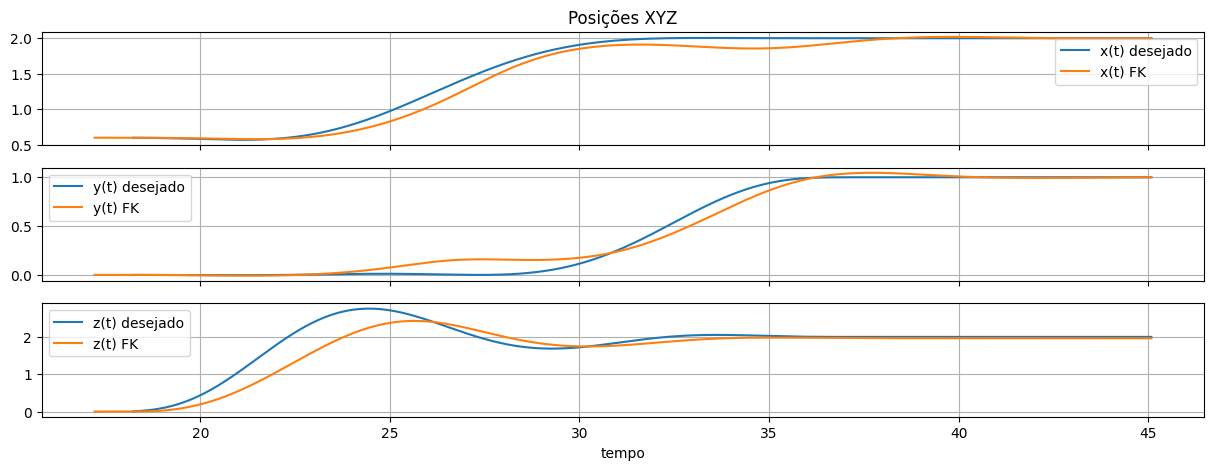

In [7]:
# gráfico das Posições
plt.subplot(3,1,1)
plt.title('Posições XYZ')
plt.plot(des_traj_df['Time'].to_numpy(), des_traj_df['cartesian_point.pose.position.x'].to_numpy())
plt.plot(actual_pos_df['Time'].to_numpy(), actual_pos_df['x'].to_numpy())
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
#frame1.axes.get_xaxis().set_ticks([])
#frame1.axes.get_xaxis().set_visible(False)
plt.grid()
plt.legend(['x(t) desejado','x(t) FK'])
plt.subplot(3,1,2)
plt.plot(des_traj_df['Time'].to_numpy(), des_traj_df['cartesian_point.pose.position.y'].to_numpy())
plt.plot(actual_pos_df['Time'].to_numpy(), actual_pos_df['y'].to_numpy())
plt.legend(['y(t) desejado','y(t) FK'])
frame2 = plt.gca()
frame2.axes.xaxis.set_ticklabels([])
#frame2.axes.get_xaxis().set_visible(False)
#frame2.axes.get_xaxis().set_visible(False)
plt.grid()
plt.subplot(3,1,3)
plt.plot(des_traj_df['Time'].to_numpy(), des_traj_df['cartesian_point.pose.position.z'].to_numpy())
plt.plot(actual_pos_df['Time'].to_numpy(), actual_pos_df['z'].to_numpy())
plt.legend(['z(t) desejado','z(t) FK'])
plt.grid()
plt.xlabel('tempo')
plt.show()



In [8]:
# tópico "velocidades lineares" -> pandas database 
actual_vel_lin = b.message_by_topic(topic='/quad/kf/vel_lin')
actual_vel_lin_df = pd.read_csv(actual_vel_lin)
actual_vel_lin_df

,Time,x,y,z
0,17.211,-2.794897e-11,-2.764548e-11,5.662405e-11
1,17.212,2.807287e-11,2.752166e-11,5.705791e-11
2,17.213,-2.794897e-11,-2.764548e-11,5.662405e-11
3,17.214,2.807287e-11,2.752166e-11,5.705791e-11
4,17.215,-2.794897e-11,-2.764548e-11,5.662405e-11
...,...,...,...,...
27869,45.080,1.069843e-03,1.745053e-03,-1.030578e-05
27870,45.081,1.070768e-03,1.742474e-03,-1.029599e-05
27871,45.082,1.071741e-03,1.739932e-03,-1.028635e-05
27872,45.083,1.072761e-03,1.737437e-03,-1.027687e-05


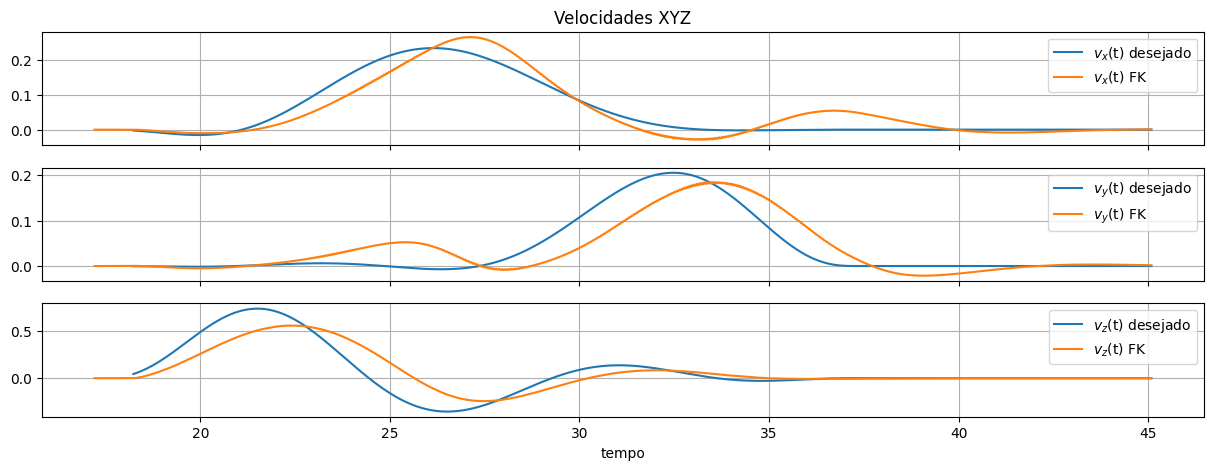

In [9]:
# gráfico das Velocidades
plt.subplot(3,1,1)
plt.title('Velocidades XYZ')
plt.plot(des_traj_df['Time'].to_numpy(), des_traj_df['cartesian_point.velocity.linear.x'].to_numpy())
plt.plot(actual_vel_lin_df['Time'].to_numpy(), actual_vel_lin_df['x'].to_numpy())
plt.legend(['$v_x$(t) desejado','$v_x$(t) FK'])
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
#frame1.axes.get_xaxis().set_ticks([])
#frame1.axes.get_xaxis().set_visible(False)
plt.grid()

plt.subplot(3,1,2)
plt.plot(des_traj_df['Time'].to_numpy(), des_traj_df['cartesian_point.velocity.linear.y'].to_numpy())
plt.plot(actual_vel_lin_df['Time'].to_numpy(), actual_vel_lin_df['y'].to_numpy())
plt.legend(['$v_y$(t) desejado','$v_y$(t) FK'])
frame2 = plt.gca()
frame2.axes.xaxis.set_ticklabels([])
#frame2.axes.get_xaxis().set_visible(False)
#frame2.axes.get_xaxis().set_visible(False)
plt.grid()

plt.subplot(3,1,3)
plt.plot(des_traj_df['Time'].to_numpy(), des_traj_df['cartesian_point.velocity.linear.z'].to_numpy())
plt.plot(actual_vel_lin_df['Time'].to_numpy(), actual_vel_lin_df['z'].to_numpy())
plt.legend(['$v_z$(t) desejado','$v_z$(t) FK'])
plt.grid()
plt.xlabel('tempo')
plt.show()
#mpld3.show()


In [10]:
# Topico "atitude" -> pandas database
actual_ati = b.message_by_topic(topic='/quad/kf/attitude')
actual_ati_df = pd.read_csv(actual_ati)
actual_ati_df

,Time,x,y,z,w
0,17.210,-2.012050e-12,7.921387e-13,4.033922e-11,1.0
1,17.211,7.602244e-13,-2.023019e-12,4.033922e-11,1.0
2,17.212,-2.012050e-12,7.921387e-13,4.033922e-11,1.0
3,17.213,7.602244e-13,-2.023019e-12,4.033922e-11,1.0
4,17.214,-2.012050e-12,7.921387e-13,4.033922e-11,1.0
...,...,...,...,...,...
27870,45.080,-1.355468e-05,2.310145e-04,1.169970e-05,1.0
27871,45.081,-1.352676e-05,2.309515e-04,1.180096e-05,1.0
27872,45.082,-1.349711e-05,2.308853e-04,1.189676e-05,1.0
27873,45.083,-1.346471e-05,2.308155e-04,1.198630e-05,1.0


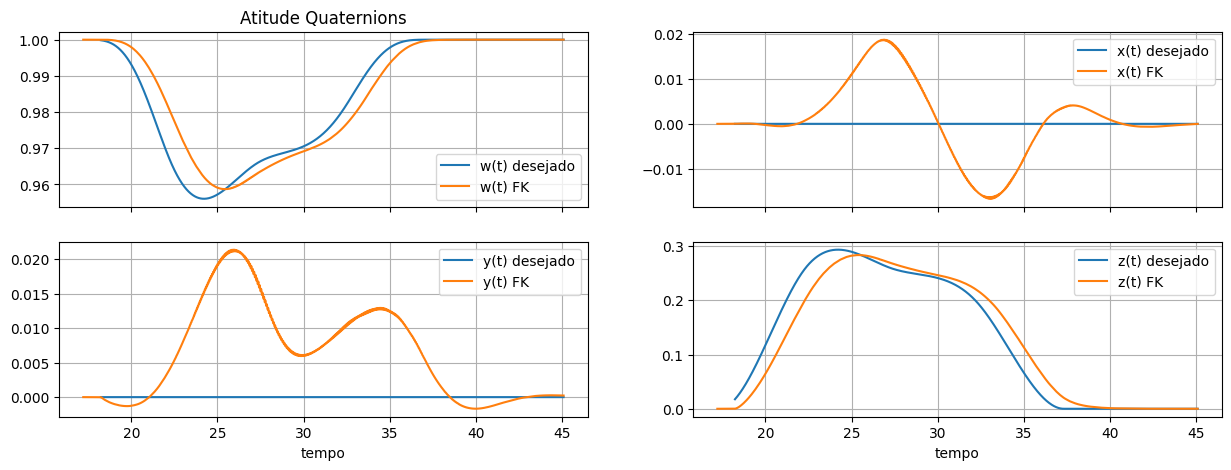

In [11]:
# gráficos da Pose
plt.subplot(2,2,1)
plt.title('Atitude Quaternions')
plt.plot(des_traj_df['Time'].to_numpy(), des_traj_df['cartesian_point.pose.orientation.w'].to_numpy())
plt.plot(actual_ati_df['Time'].to_numpy(), actual_ati_df['w'].to_numpy())
plt.legend(['w(t) desejado','w(t) FK'])
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
#frame1.axes.get_xaxis().set_ticks([])
#frame1.axes.get_xaxis().set_visible(False)
plt.grid()

plt.subplot(2,2,2)
plt.plot(des_traj_df['Time'].to_numpy(), des_traj_df['cartesian_point.pose.orientation.x'].to_numpy())
plt.plot(actual_ati_df['Time'].to_numpy(), actual_ati_df['x'].to_numpy())
plt.legend(['x(t) desejado','x(t) FK'])
frame2 = plt.gca()
frame2.axes.xaxis.set_ticklabels([])
#frame2.axes.get_xaxis().set_visible(False)
#frame2.axes.get_xaxis().set_visible(False)
plt.grid()

plt.subplot(2,2,3)
plt.plot(des_traj_df['Time'].to_numpy(), des_traj_df['cartesian_point.pose.orientation.y'].to_numpy())
plt.plot(actual_ati_df['Time'].to_numpy(), actual_ati_df['y'].to_numpy())
plt.legend(['y(t) desejado','y(t) FK'])
plt.grid()
plt.xlabel('tempo')

plt.subplot(2,2,4)
plt.plot(des_traj_df['Time'].to_numpy(), des_traj_df['cartesian_point.pose.orientation.z'].to_numpy())
plt.plot(actual_ati_df['Time'].to_numpy(), actual_ati_df['z'].to_numpy())
plt.legend(['z(t) desejado','z(t) FK'])
plt.grid()
plt.xlabel('tempo')

plt.show()

In [12]:
# tópico "atitude em euler" -> pandas database
actual_ati_euler = b.message_by_topic(topic='/quad/kf/euler')
actual_ati_euler_df = pd.read_csv(actual_ati_euler)
actual_ati_euler_df

,Time,phi,theta,psi
0,17.211,1.520449e-12,-4.046097e-12,8.067844e-11
1,17.212,-4.024100e-12,1.584288e-12,8.067844e-11
2,17.213,1.520449e-12,-4.046097e-12,8.067844e-11
3,17.214,-4.024100e-12,1.584288e-12,8.067844e-11
4,17.215,1.520449e-12,-4.046097e-12,8.067844e-11
...,...,...,...,...
27869,45.080,-2.710396e-05,4.620293e-04,2.339313e-05
27870,45.081,-2.704806e-05,4.619034e-04,2.359568e-05
27871,45.082,-2.698874e-05,4.617708e-04,2.378729e-05
27872,45.083,-2.692389e-05,4.616313e-04,2.396638e-05


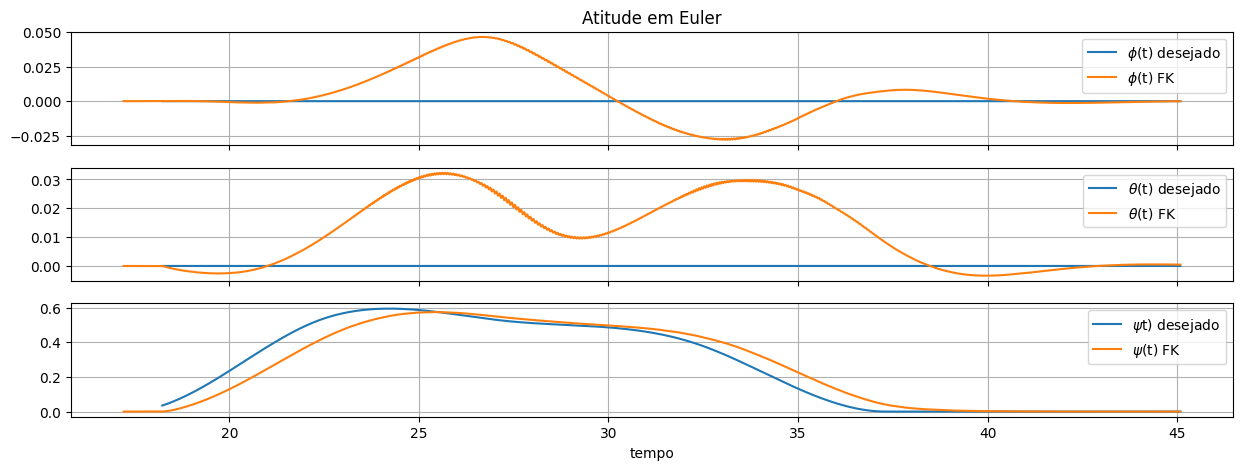

In [13]:
# Gráficos de Atitude em ầngulos de Euler
plt.subplot(3,1,1)
plt.title('Atitude em Euler')
plt.plot(des_traj_df['Time'].to_numpy(), des_traj_df['cartesian_point.pose.euler_orientation.phi'].to_numpy())
plt.plot(actual_ati_euler_df['Time'].to_numpy(), actual_ati_euler_df['phi'].to_numpy())
plt.legend(['$\phi$(t) desejado','$\phi$(t) FK'])
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
#frame1.axes.get_xaxis().set_ticks([])
#frame1.axes.get_xaxis().set_visible(False)
plt.grid()

plt.subplot(3,1,2)
plt.plot(des_traj_df['Time'].to_numpy(), des_traj_df['cartesian_point.pose.euler_orientation.theta'].to_numpy())
plt.plot(actual_ati_euler_df['Time'].to_numpy(), actual_ati_euler_df['theta'].to_numpy())
plt.legend(['$\\theta$(t) desejado','$\\theta$(t) FK'])
frame2 = plt.gca()
frame2.axes.xaxis.set_ticklabels([])
#frame2.axes.get_xaxis().set_visible(False)
#frame2.axes.get_xaxis().set_visible(False)
plt.grid()

plt.subplot(3,1,3)
plt.plot(des_traj_df['Time'].to_numpy(), des_traj_df['cartesian_point.pose.euler_orientation.psi'].to_numpy())
plt.plot(actual_ati_euler_df['Time'].to_numpy(), actual_ati_euler_df['psi'].to_numpy())
plt.legend(['$\psi$t) desejado','$\psi$(t) FK'])
plt.grid()
plt.xlabel('tempo')
plt.show()

In [14]:
# tópico "velocidades angulares" -> pandas database 
actual_vel_ang = b.message_by_topic(topic='/quad/kf/vel_ang')
actual_vel_ang_df = pd.read_csv(actual_vel_ang)
actual_vel_ang_df

,Time,x,y,z
0,17.211,5.529139e-09,-5.589768e-09,4.688499e-16
1,17.212,-5.504346e-09,5.614561e-09,1.565813e-16
2,17.213,5.529139e-09,-5.589768e-09,4.688499e-16
3,17.214,-5.504346e-09,5.614561e-09,1.565812e-16
4,17.215,5.529139e-09,-5.589768e-09,4.688499e-16
...,...,...,...,...
27869,45.080,5.458061e-05,-1.198197e-04,2.118150e-04
27870,45.081,5.590200e-05,-1.259434e-04,2.025238e-04
27871,45.082,5.933130e-05,-1.325398e-04,1.915770e-04
27872,45.083,6.485268e-05,-1.395656e-04,1.790618e-04


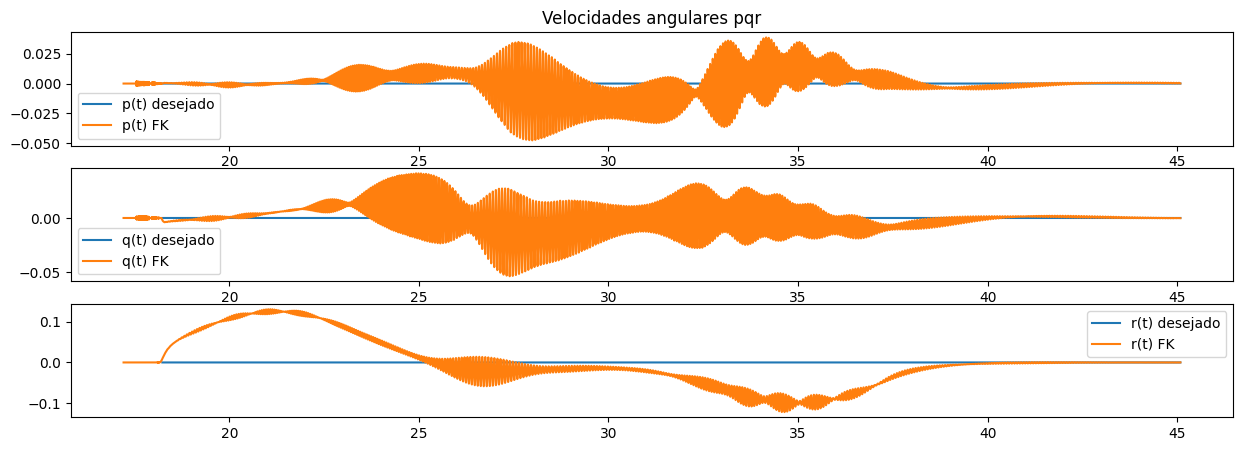

In [15]:
# Angular Twist
# Velocidades angulares (p,q,r) desejadas-> pandas database
# A velocidade angular desejada é dada em rad/s no sistema de coordenadas do corpo NÃO está sendo produtecido pelo gerador de trajetória.
plt.subplot(3,1,1)
plt.title('Velocidades angulares pqr')
plt.plot(des_traj_df['Time'].to_numpy(), des_traj_df['cartesian_point.velocity.angular.x'].to_numpy(), label='p(t) desejado')
plt.plot(actual_vel_ang_df['Time'].to_numpy(), actual_vel_ang_df['x'].to_numpy(), label='p(t) FK')
plt.legend()
plt.subplot(3,1,2)
plt.plot(des_traj_df['Time'].to_numpy(), des_traj_df['cartesian_point.velocity.angular.y'].to_numpy(), label='q(t) desejado')
plt.plot(actual_vel_ang_df['Time'].to_numpy(), actual_vel_ang_df['y'].to_numpy(), label='q(t) FK')
plt.legend()
plt.subplot(3,1,3)
plt.plot(des_traj_df['Time'].to_numpy(), des_traj_df['cartesian_point.velocity.angular.z'].to_numpy(), label='r(t) desejado')
plt.plot(actual_vel_ang_df['Time'].to_numpy(), actual_vel_ang_df['z'].to_numpy(), label='r(t) FK')
plt.legend()
plt.show()

In [16]:
# saída do controle de posição e velocidade
pos_control_output = b.message_by_topic(topic='/quad/control/position_controller_output')
pos_control_output_df = pd.read_csv(pos_control_output)
pos_control_output_df

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,position_controller_output.thrust.num,position_controller_output.orientation_set_point.w,position_controller_output.orientation_set_point.x,position_controller_output.orientation_set_point.y,position_controller_output.orientation_set_point.z,position_controller_output.euler_set_point.phi,position_controller_output.euler_set_point.theta,position_controller_output.euler_set_point.psi
0,18.233,92,18,233000000,NaN,10.434592,0.999846,6.205565e-05,-0.000529,0.017516,1.055530e-04,-0.001060,0.035034
1,18.243,93,18,243000000,NaN,10.444387,0.999840,6.344967e-05,-0.000539,0.017877,1.075937e-04,-0.001081,0.035756
2,18.253,94,18,253000000,NaN,10.454338,0.999833,6.482855e-05,-0.000550,0.018241,1.095821e-04,-0.001102,0.036485
3,18.263,95,18,263000000,NaN,10.464441,0.999827,6.618901e-05,-0.000560,0.018609,1.115118e-04,-0.001122,0.037220
4,18.273,96,18,273000000,NaN,10.474693,0.999820,6.753154e-05,-0.000570,0.018980,1.133837e-04,-0.001143,0.037961
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2681,45.043,2773,45,43000000,NaN,10.417129,1.000000,-4.134384e-06,0.000258,0.000002,-8.267929e-06,0.000516,0.000003
2682,45.053,2774,45,53000000,NaN,10.417130,1.000000,-2.297750e-06,0.000257,0.000002,-4.594666e-06,0.000514,0.000003
2683,45.063,2775,45,63000000,NaN,10.417131,1.000000,-4.700139e-07,0.000256,0.000002,-9.391963e-07,0.000512,0.000003
2684,45.073,2776,45,73000000,NaN,10.417132,1.000000,1.339234e-06,0.000255,0.000002,2.679296e-06,0.000509,0.000003


In [17]:
# Saída do controle de atitude
ati_control_output = b.message_by_topic(topic='/quad/control/attitude_controller_output')
ati_control_output_df = pd.read_csv(ati_control_output)
ati_control_output_df

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,torques.x,torques.y,torques.z
0,18.233,92,18,233000000,NaN,0.000197,-0.001859,6.249182e-03
1,18.243,93,18,243000000,NaN,0.000197,-0.001779,6.303999e-03
2,18.253,94,18,253000000,NaN,0.000193,-0.001730,6.365762e-03
3,18.263,95,18,263000000,NaN,0.000175,-0.001669,6.412283e-03
4,18.273,96,18,273000000,NaN,0.000151,-0.001618,6.459913e-03
...,...,...,...,...,...,...,...,...
2681,45.043,2773,45,43000000,NaN,0.000030,0.000089,2.715664e-06
2682,45.053,2774,45,53000000,NaN,0.000032,0.000081,-4.935323e-08
2683,45.063,2775,45,63000000,NaN,0.000055,0.000073,-4.636499e-06
2684,45.073,2776,45,73000000,NaN,0.000081,0.000069,-7.710543e-06


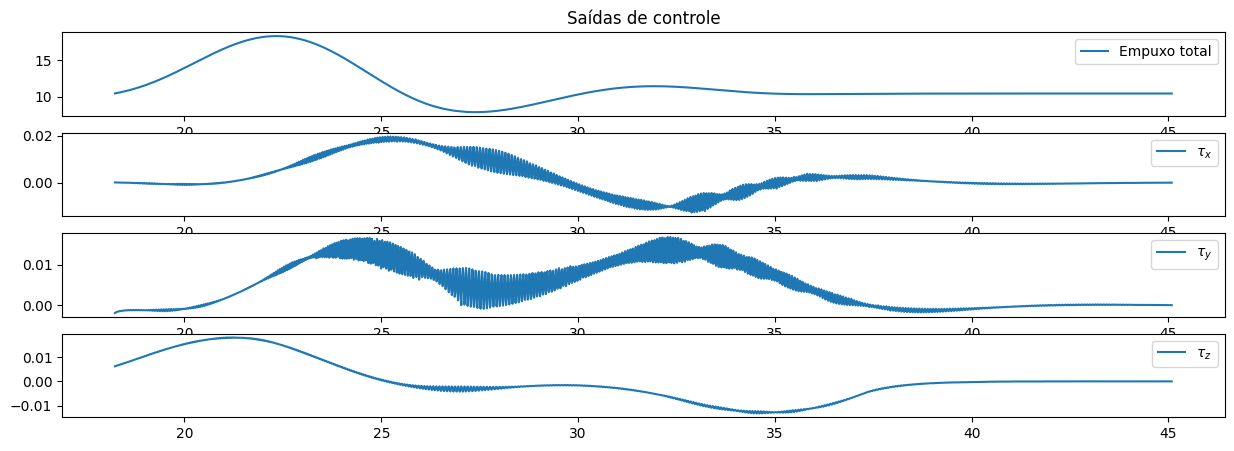

In [18]:
# Saídas de controle
plt.subplot(4,1,1)
plt.title('Saídas de controle')
plt.plot(pos_control_output_df['Time'].to_numpy(),\
    pos_control_output_df['position_controller_output.thrust.num'].to_numpy(),\
        linewidth=1.5, label='Empuxo total')
plt.legend()
plt.subplot(4,1,2)
plt.plot(ati_control_output_df['Time'].to_numpy(),\
    ati_control_output_df['torques.x'].to_numpy(),\
        linewidth=1.5, label='$\\tau_x$')
plt.legend()
plt.subplot(4,1,3)
plt.plot(ati_control_output_df['Time'].to_numpy(),\
    ati_control_output_df['torques.y'].to_numpy(),\
        linewidth=1.5, label='$\\tau_y$')
plt.legend()
plt.subplot(4,1,4)
plt.plot(ati_control_output_df['Time'].to_numpy(),\
    ati_control_output_df['torques.z'].to_numpy(),\
        linewidth=1.5, label='$\\tau_z$')
plt.legend()
plt.show()

In [19]:
# Relação entre ângulos de Euler e velocidades angulares
t = actual_ati_euler_df['Time'].to_numpy()
phi = actual_ati_euler_df['phi'].to_numpy()
theta = actual_ati_euler_df['theta'].to_numpy()
psi = actual_ati_euler_df['psi'].to_numpy()
p = actual_vel_ang_df['x'].to_numpy()
q = actual_vel_ang_df['y'].to_numpy()
r = actual_vel_ang_df['z'].to_numpy()
from scipy import integrate
phi_int = integrate.cumtrapz(p, t, initial=0)
theta_int = integrate.cumtrapz(q, t, initial=0)
psi_int = integrate.cumtrapz(r, t, initial=0)


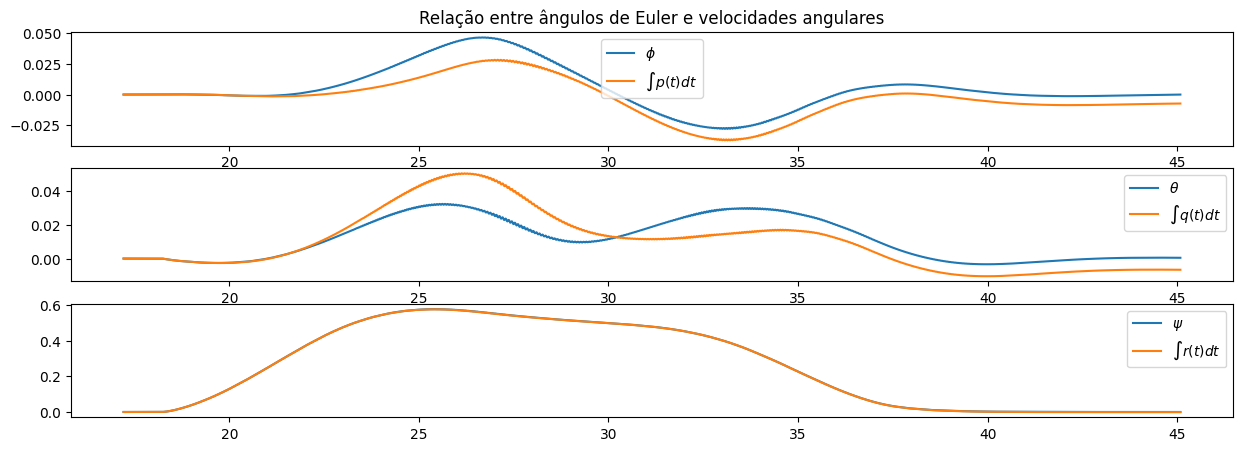

In [20]:
plt.subplot(3,1,1)
plt.title('Relação entre ângulos de Euler e velocidades angulares')
plt.plot(t,phi,label='$\phi$')
plt.plot(t,phi_int,label='$\int p(t)dt$')
plt.legend()
plt.subplot(3,1,2)
plt.plot(t,theta,label='$\\theta$')
plt.plot(t,theta_int,label='$\int q(t)dt$')
plt.legend()
plt.subplot(3,1,3)
plt.plot(t,psi,label='$\psi$')
plt.plot(t,psi_int,label='$\int r(t)dt$')
plt.legend()
plt.show()

In [21]:
import numpy as np
#phi_der = np.gradient(phi, t)
#theta_der = np.gradient(theta, t)
#psi_der = np.gradient(psi, t)

In [22]:
phi_der = np.zeros(len(t))
theta_der = np.zeros(len(t))
psi_der = np.zeros(len(t))
for i in range(1,len(t)):
    W = np.array([[1,0,-np.sin(theta[i])],
              [0,np.cos(phi[i]),np.sin(phi[i])*np.cos(theta[i])],
              [0,-np.sin(phi[i]),np.cos(phi[i])*np.cos(theta[i])]])
    W_inv = np.linalg.inv(W)
    pqr = np.array([p[i],q[i],r[i]]).T
    euler_rates = np.dot(W_inv,pqr.T).T
    #print(euler_rates)
    phi_der[i] = euler_rates[0]
    theta_der[i] = euler_rates[1]
    psi_der[i] = euler_rates[2]

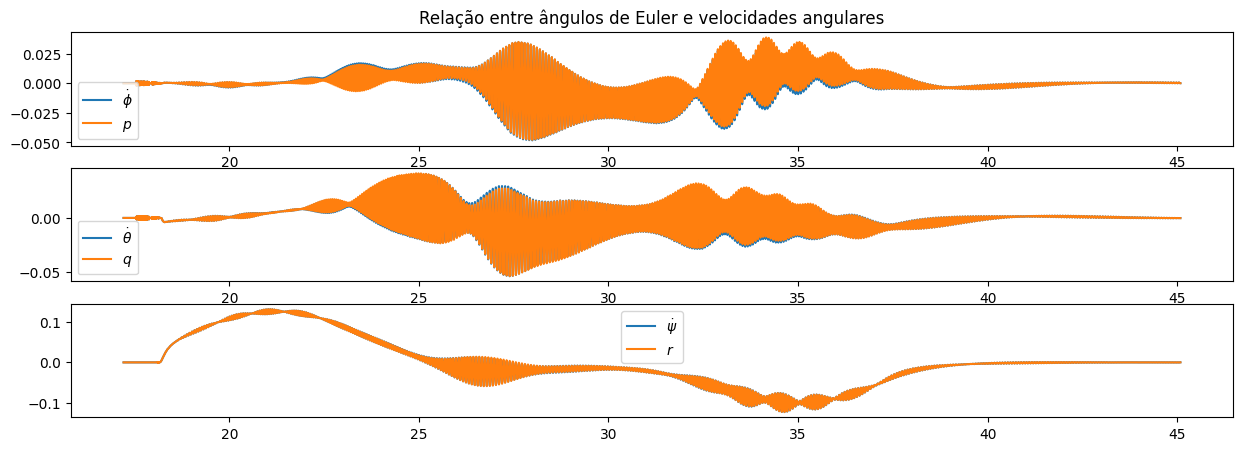

In [23]:
plt.subplot(3,1,1)
plt.title('Relação entre ângulos de Euler e velocidades angulares')
plt.plot(t,phi_der,label='$\dot\phi$')
plt.plot(t,p,label='$p$')
plt.legend()
plt.subplot(3,1,2)
plt.plot(t,theta_der,label='$\dot\\theta$')
plt.plot(t,q,label='$q$')
plt.legend()
plt.subplot(3,1,3)
plt.plot(t,psi_der,label='$\dot\psi$')
plt.plot(t,r,label='$r$')
plt.legend()
plt.show()

In [24]:
phi_der_2 = np.gradient(phi, t)
theta_der_2 = np.gradient(theta, t)
psi_der_2 = np.gradient(psi, t)

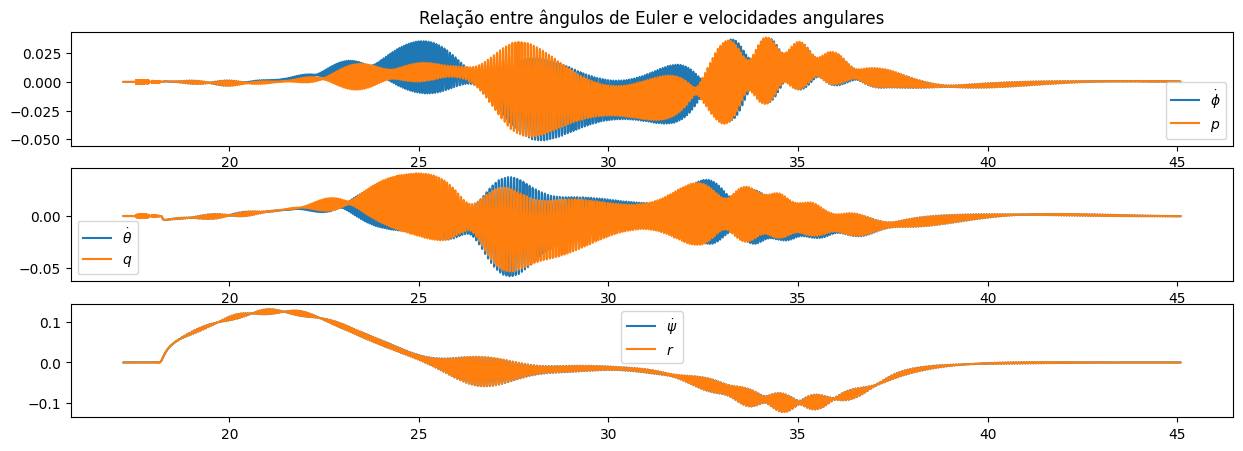

In [25]:
plt.subplot(3,1,1)
plt.title('Relação entre ângulos de Euler e velocidades angulares')
plt.plot(t,phi_der_2,label='$\dot\phi$')
plt.plot(t,p,label='$p$')
plt.legend()
plt.subplot(3,1,2)
plt.plot(t,theta_der_2,label='$\dot\\theta$')
plt.plot(t,q,label='$q$')
plt.legend()
plt.subplot(3,1,3)
plt.plot(t,psi_der_2,label='$\dot\psi$')
plt.plot(t,r,label='$r$')
plt.legend()
plt.show()

In [27]:
p_2=np.zeros(len(t))
q_2=np.zeros(len(t))
r_2=np.zeros(len(t))

for i in range(1,len(t)):
    W = np.array([[1,0,-np.sin(theta[i])],
              [0,np.cos(phi[i]),np.sin(phi[i])*np.cos(theta[i])],
              [0,-np.sin(phi[i]),np.cos(phi[i])*np.cos(theta[i])]])
    euler_der = np.array([phi_der_2[i],theta_der_2[i],psi_der_2[i]]).T
    pqr_2 = np.dot(W,euler_der.T).T
    p_2[i] = pqr_2[0]
    q_2[i] = pqr_2[1]
    r_2[i] = pqr_2[2]

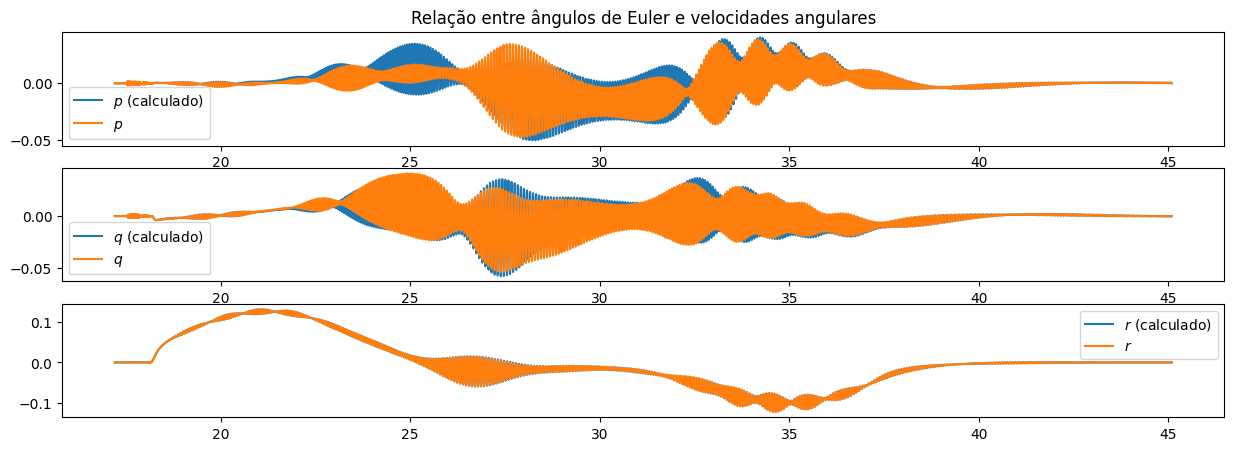

In [28]:
plt.subplot(3,1,1)
plt.title('Relação entre ângulos de Euler e velocidades angulares')
plt.plot(t,p_2,label='$p$ (calculado)')
plt.plot(t,p,label='$p$')
plt.legend()
plt.subplot(3,1,2)
plt.plot(t,q_2,label='$q$ (calculado)')
plt.plot(t,q,label='$q$')
plt.legend()
plt.subplot(3,1,3)
plt.plot(t,r_2,label='$r$ (calculado)')
plt.plot(t,r,label='$r$')
plt.legend()
plt.show()

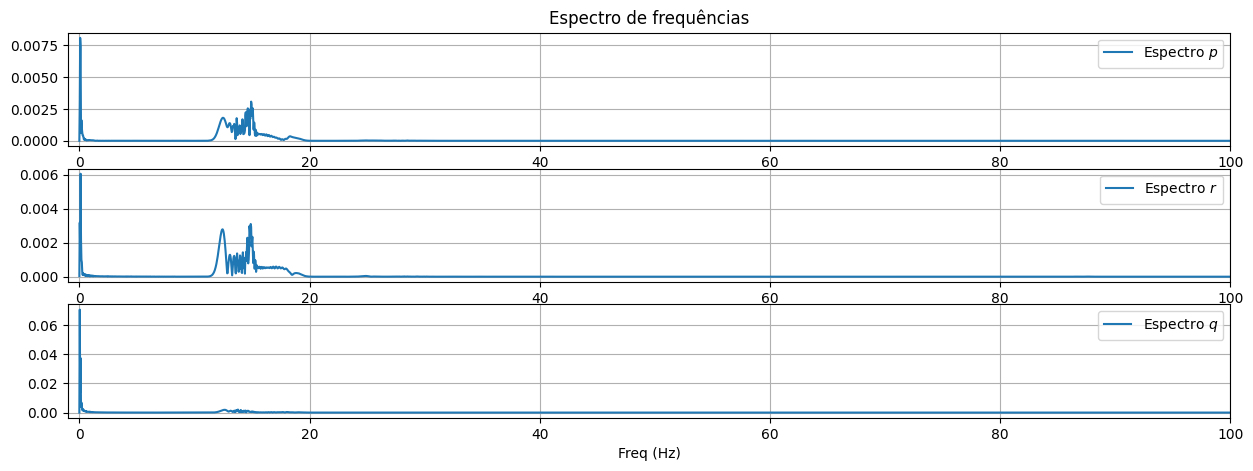

In [43]:
# Espectro de frequências
from scipy.fft import fft, fftfreq
# Number of sample points
N = len(t)
# sample spacing
T = t[1]-t[0]
yp = phi_der_2
ypf = fft(yp)
xf = fftfreq(N, T)[:N//2]
#
yr = theta_der_2
yrf = fft(yr)
#
yq = psi_der_2
yqf = fft(yq)
#
plt.subplot(3,1,1)
plt.title('Espectro de frequências')
plt.plot(xf, 2.0/N * np.abs(ypf[0:N//2]),label='Espectro $p$')
plt.xlim(-1,100)
plt.grid()
plt.legend()
plt.subplot(3,1,2)
plt.plot(xf, 2.0/N * np.abs(yrf[0:N//2]),label='Espectro $r$')
plt.xlim(-1,100)
plt.grid()
plt.legend()
plt.subplot(3,1,3)
plt.plot(xf, 2.0/N * np.abs(yqf[0:N//2]),label='Espectro $q$')
plt.xlim(-1,100)
plt.xlabel('Freq (Hz)')
plt.grid()
plt.legend()
plt.show()

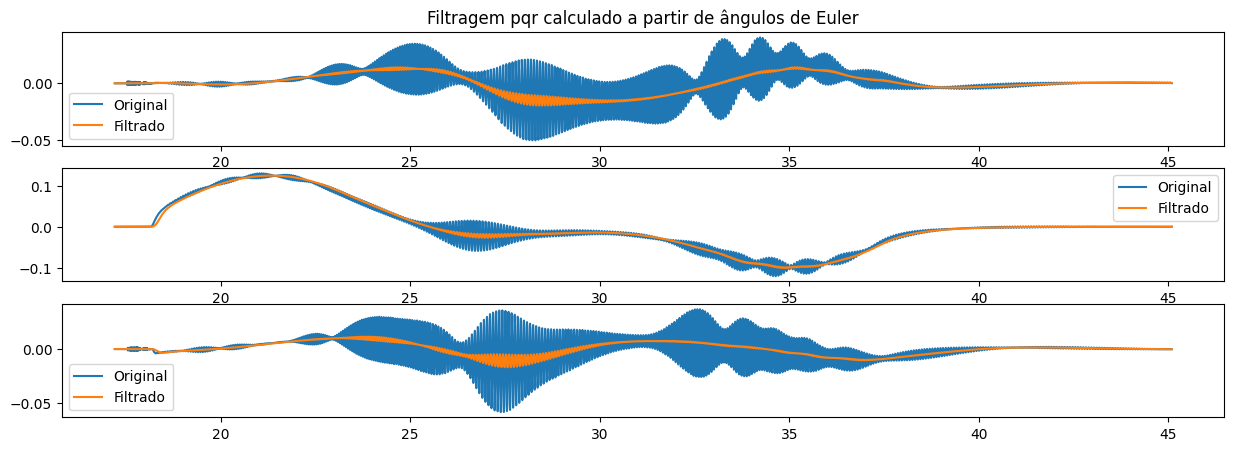

In [46]:
# Filtering
from scipy.signal import butter, lfilter, freqz
n=200
b = [1.0 / n] * n
a = 1
yyp = lfilter(b, a, phi_der_2)
yyq = lfilter(b, a, theta_der_2)
yyr = lfilter(b, a, psi_der_2)
#
plt.subplot(3,1,1)
plt.title('Filtragem pqr calculado a partir de ângulos de Euler')
plt.plot(t, p_2, label='Original')
plt.plot(t, yyp, label='Filtrado')
plt.legend()
plt.subplot(3,1,2)
yyr = lfilter(b, a, r_2)
plt.plot(t, r_2, label='Original')
plt.plot(t, yyr, label='Filtrado')
plt.legend()
plt.subplot(3,1,3)
yyq = lfilter(b, a, q_2)
plt.plot(t, q_2, label='Original')
plt.plot(t, yyq, label='Filtrado')
plt.legend()
plt.show()